<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/5_naive_bayes_lab_SWJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Native Bayes</h1>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris, load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 나이브 베이즈 분류기
* 베이즈 정리(Bayes Theorem)에 기반한 확율적 분류 알고리즘
* 나이브 (Naive) : 순수하다,
    * 각 특성을 개별적으로 취급
    * 통계를 단순하게 취합
    * 확률적 근거로 문제를 해결
    * 각 항목의 특성을 순수하게 본다.
* 주요 분야
    * 문서 분류, 스팸 필터
    * 이상행동(거래) 검출
    * 질병 진단

### 조건부 확률
* $P(A|B)$
    * B가 일어난 상황에서 A가 일어난 상황
    * 표본 공간에서 전체가 아닌 $P(B)$가 되는 것과 같다 	
    * $ \displaystyle P(A|B) = \frac{P(A \bigcap B)}{P(B)}$

### 베이즈 정리
* $ \displaystyle P(h|D) = \frac{P(D|h)P(h)}{P(D)}$ 
    * $P(h)$ : h(hypothesis) 가설이 True일 확률, 사전 확률(전체 데이타 무관)
    * $P(D)$ : 데이터의 사전 확률, 가설 h와 무관
    * $P(h|D)$ : 데이타 D가 주어졌을 때 가설 h의 사후 확률
    * $P(D|h)$ : 가설 h가 True로 주어 졌을 때 데이타 D의 사후 확률

### 머신러닝 관점에서 재 정리
* $ \displaystyle P(y|X) = \frac{P(X|y)P(y)}{P(X)}$ 


### 나이브 베이즈 주요 흐름
* 주어진 클래스 레이블에 대한 사전 확률 계산
* 각 클래스의 각 속성에 대한 우도(Likelihood) 찾기
* 베이즈 정리 공식에 대입해서 사후 확률 계산
* 주어진 입력에 대한 높은 확률 클래스 찾기
* 주의
    * zero 확률 문제


### sklearn에 구현된 Naive Base 
* `sklearn.naive_bayes.GaussianNB()`
    * 연속적 데이타
    * 클래스별 각 특성의 표준편차와 평균을 저장
* `sklearn.naive_bayes.BernoulliNB()`
    * 이진 데이타
    * 각 클래스의 특성 중에 1이 아닌것의 갯수
* `sklearn.naive_bayes.MultinomialNB()`
    * 이산 데이타 중에 카운트 데이타
    * 클래스별 특성의 평균 계산
* `sklearn.naive_bayes.CategoricalNB()`

# 날씨에 따른 경기 진행 예측 사례

In [ ]:
url = 'https://www.dropbox.com/s/v0nd5we69uly3y4/tennis.csv?dl=1'
file = 'tennis.csv'

In [ ]:
import os
if os.name =='posix':
  !wget -O $file $url
else:
  !pip install wget
  import wget
  wget.download(url, out=file)

--2022-09-22 05:16:39--  https://www.dropbox.com/s/v0nd5we69uly3y4/tennis.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/v0nd5we69uly3y4/tennis.csv [following]
--2022-09-22 05:16:39--  https://www.dropbox.com/s/dl/v0nd5we69uly3y4/tennis.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf11380e0aeab0804bcd5e2347.dl.dropboxusercontent.com/cd/0/get/BtZTYR8iXWtAe-ZeoJUssuyyOxiU0x98gxFb6ynVljDu4bUL1iWVEPRs32fqxSkiDmgLfzXIQhXaX1hH6x6OsaFyC1OvZCQaW0zsoFe5mqmPQB7W2DkZct_WPwy1yE1T6xsqwHnrbvwWG97Wikk6d5QQOqEiUvBtDoPaQHjF3y5PkA/file?dl=1# [following]
--2022-09-22 05:16:39--  https://ucaf11380e0aeab0804bcd5e2347.dl.dropboxusercontent.com/cd/0/get/BtZTYR8iXWtAe-ZeoJUssuyyOxiU0x98gxFb6ynVljDu4bUL1iWVEPRs32fqxSkiDmgLfzXIQhXaX1hH6x6O

In [ ]:
data = pd.read_csv(file, dtype='category')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
pd.crosstab(data['outlook'], data['play'], margins=True)

play,no,yes,All
outlook,,,
overcast,0,4,4
rainy,2,3,5
sunny,3,2,5
All,5,9,14


## 비오는날 경기를 할 확률?
* evidence:
  * $P(outlook=rainy) = 5/14$
* prior:
  * $P(play=no) = 5/14$
  * $P(play=yes) = 9/14$
* likelihood
  * $P(outlook=rainy|play=no) = 2/5$
  * $P(outlook=rainy|play=yes) = 3/9$
* posterior
  * $P(play=no|outlook=rainy) = = \frac{(2/5) * (5/14)}{(5/14)}$
  * $P(play=yes|outlook=rainy) = = \frac{(3/9) * (9/14)}{(5/14)}$



In [ ]:
p_no = (2/5)*(5/14) / (5/14)
p_yes = (3/9)*(9/14) / (5/14)
y_proba = (p_no, p_yes)
y_pred = np.argmax(y_proba)
print('probability:', y_proba)
print('y_pred:', y_pred)

probability: (0.4, 0.6)
y_pred: 1


In [ ]:
df_code = data.apply(lambda col:col.cat.codes)
df_code

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [ ]:
data['outlook'].cat.categories

Index(['overcast', 'rainy', 'sunny'], dtype='object')

In [ ]:
data['humidity'].cat.categories

Index(['high', 'normal'], dtype='object')

In [ ]:
data['temp'].cat.categories

Index(['cool', 'hot', 'mild'], dtype='object')

In [ ]:
data['windy'].cat.categories

Index(['False', 'True'], dtype='object')

In [ ]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB(alpha=0)
cnb.fit(df_code[['outlook']], df_code['play'])
y_proba = cnb.predict_proba([[1]])
y_pred = cnb.predict([[1]])
print(y_proba, y_pred)

[[0.4 0.6]] [1]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


# Naive Bayes
* 여러 특징들이 모두 독립적인 것으로 간주
* 분모는 각 클래스마다 동일하기 때문에 생략 가능
* $\displaystyle\hat{y}= \text{argmax}_yP(y|X) = \text{argmax}_y\frac{P(x_1|y)\cdot P(x_2|y)\dots  P(x_n|y)\cdot P(y)}{P(X)} $
* $\displaystyle\hat{y}= \text{argmax}_yP(y|X) = \text{argmax}_y\frac{P(y)\Pi_{i=1}^n P(x_i|y)}{P(X)}$
* $\displaystyle\hat{y}= \text{argmax}_yP(y|X) = \text{argmax}_yP(y)\Pi_{i=1}^n P(x_i|y)$


In [ ]:
p_no = (2/5)*(5/14) 
p_yes = (3/9)*(9/14)
y_proba = (p_no, p_yes)
y_pred = np.argmax(y_proba)
y_proba_1 = (p_no/(p_no+p_yes)), (p_yes/(p_no+p_yes))
print('probability:', y_proba, y_proba_1)
print('y_pred:', y_pred)

probability: (0.14285714285714288, 0.2142857142857143) (0.39999999999999997, 0.6)
y_pred: 1


# 다항 특성 
## Sunny, hot, high, True의 경기 확률
* outlook:Sunny(2)
  * $P(sunny|no)=3/5$
  * $P(sunny|yes)=2/9$
* temp:hot(1)
  * $P(hot|no)=2/5$
  * $P(hot|yes)=2/9$
* humidity:high(0)
  * $P(high|no) = 4/5$
  * $P(high|yes) = 3/9$
* windy:True(1)
  * $P(True|no)=3/5$
  * $P(True|yes)=3/9$
* $P(no|sunny, hot, high, True)=\frac{3}{5}\times \frac{2}{5}\times\frac{4}{5}\times\frac{3}{5}\times\frac{5}{14}$
* $P(yes|sunny, hot, high, True)=\frac{2}{9}\times \frac{2}{9}\times\frac{3}{9}\times\frac{3}{9}\times\frac{9}{14}$

In [ ]:
display(pd.crosstab(data['outlook'], data['play'], margins=True))
display(pd.crosstab(data['temp'], data['play'], margins=True))
display(pd.crosstab(data['humidity'], data['play'], margins=True))
display(pd.crosstab(data['windy'], data['play'], margins=True))

play,no,yes,All
outlook,,,
overcast,0,4,4
rainy,2,3,5
sunny,3,2,5
All,5,9,14


play,no,yes,All
temp,,,
cool,1,3,4
hot,2,2,4
mild,2,4,6
All,5,9,14


play,no,yes,All
humidity,,,
high,4,3,7
normal,1,6,7
All,5,9,14


play,no,yes,All
windy,,,
False,2,6,8
True,3,3,6
All,5,9,14


In [ ]:
p_no = (3/5)*(2/5)*(4/5)*(3/5)*(5/14)
p_yes= (2/9)*(2/9)*(3/9)*(3/9)*(9/14)
y_proba = (p_no, p_yes)
y_pred = np.argmax(y_proba)
y_proba_1 = (p_no/(p_no+p_yes)), (p_yes/(p_no+p_yes))
print('probability:', y_proba, y_proba_1)
print('y_pred:', y_pred)

probability: (0.04114285714285714, 0.0035273368606701934) (0.9210360075805433, 0.07896399241945672)
y_pred: 0


In [ ]:
df_code.iloc[:,:-1]

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [ ]:
cnb = CategoricalNB(alpha=0)
cnb.fit(df_code.iloc[:,:-1].values, df_code['play'].values)
y_proba = cnb.predict_proba([[2,1,0,1]])
y_pred = cnb.predict([[2,1,0,1]]) 
print('probability:', y_proba)
print('y_pred:', y_pred)

probability: [[0.92103601 0.07896399]]
y_pred: [0]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN



# Laplace smoothing(라플라스 보정)
* 분자의 확률 중에 단 하나라도 0이 나오면 전체가 0이 되는 문제
* 0를 임의의 수가 되도록 보정
  * 일반적으로 1
* $P(x_i=t|y=c) = \frac{N_{tic} + \alpha}{N_c + \alpha n_i}$

In [ ]:
p_no = ((3+1)/(5+3))*((2+1)/(5+3))*((4+1)/(5+2))*((3+1)/(5+2))*(5/14)
p_yes= ((2+1)/(9+3))*((2+1)/(9+3))*((3+1)/(9+2))*((3+1)/(9+2))*(9/14)
y_proba = (p_no/(p_no+p_yes)), (p_yes/(p_no+p_yes))
y_pred = np.argmax(y_proba)
print('probability:', y_proba,)
print('y_pred:', y_pred)

probability: (0.8372543592582342, 0.1627456407417659)
y_pred: 0


In [ ]:
cnb = CategoricalNB(alpha=1)
cnb.fit(df_code.iloc[:, :-1].values, df_code['play'].values)
y_proba = cnb.predict_proba([[2,1,0,1]])
y_pred = cnb.predict([[2,1,0,1]]) 

print('probability:', y_proba)
print('y_pred:', y_pred)

probability: [[0.83725436 0.16274564]]
y_pred: [0]


# Gaussian Naive Bayes
* 붓꽃 분류

In [ ]:
from sklearn.naive_bayes import GaussianNB
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,\
                                                    random_state=0)


Train Accuracy : 0.9464285714285714
Test Accuracy1 : 1.0


# BernoulliNB Naive Bayes
* 숫자 손 글씨 이진화

Train Accuracy : 0.9005196733481812
Test Accuracy1 : 0.8977777777777778


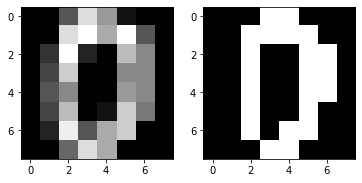

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

digits = load_digits()  
X = Binarizer(threshold=7).fit_transform(digits.data)
plt.subplot(1,2,1)
plt.imshow(digits.data[0, :].reshape((8,8)), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')

X_train, X_test, y_train, y_test = train_test_split(X, digits.target, random_state=0)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Train Accuracy :", bnb.score(X_train, y_train))
print("Test Accuracy1 :", bnb.score(X_test, y_test))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
digits = load_digits()  
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,\
                                                    random_state=0)



Train Accuracy : 0.9005196733481812
Test Accuracy1 : 0.8977777777777778


# MultinomialNB
* 20newsgroup

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
X_ = counter.fit_transform([
                            'I love you, you love me',
                            'you gave me love',
                            'Do you love me'])
print(counter.get_feature_names_out())
print(X_.toarray())

['do' 'gave' 'love' 'me' 'you']
[[0 0 2 1 2]
 [0 1 1 1 1]
 [1 0 1 1 1]]


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB

news_train = fetch_20newsgroups(subset="train")
news_test = fetch_20newsgroups(subset="test")

counter = CountVectorizer()
X_train, y_train = counter.fit_transform(news_train.data), news_train.target
X_test, y_test = counter.transform(news_test.data), news_test.target



Train Accuracy : 0.9245182959165635
Test Accuracy1 : 0.7728359001593202
